In [121]:
# making buffers ! - first use geometric, later base on transport distance?

# First, load packages
import pandas as pd
import os
import numpy as np
import shapely as sp

import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
# only for jupyter nb to show plots inline
%matplotlib inline 

#set wd
os.chdir("/Users/anayahall/projects/grapevine")

from scripts.fxns import epsg_meters

def epsg_meters(gdf, proj=3310):
    g = gdf.copy()
    g = g.to_crs(epsg=proj)
    return g

In [122]:
### LOAD ALL DATA

# Load SWIS DATA
swis_proj =  gpd.read_file("data/clean/clean_swis.shp")

# LOAD COUNTY SHAPEFILE 
CA_proj = gpd.read_file("data/raw/CA_Counties/CA_Counties_TIGER2016.shp")
# print("Ca_proj crs: ", CA_proj.crs)
CA_proj.head()

# LOAD BIOMASS DATA
waste_proj = gpd.read_file("data/clean/techbiomass_pts.shp")

#CONVERT TO METERS!!
swis2 = epsg_meters(swis_proj)

swis2.crs

# load census tract shapefile ? might use for elsewhere?
# CA = gpd.read_file("data/raw/tl_2018_06_tract/tl_2018_06_tract.shp")

{'init': 'epsg:3310', 'no_defs': True}

In [123]:
waste = pd.read_csv("data/raw/biomass.inventory.technical.csv")
waste.columns = ['County', 'Feedstock', 'BDTons', 'year', 'Category']
# waste.head()

ofmsw = waste[waste['Category'] == "organic fraction municipal solid waste"]
# ofmsw = msw[(msw['Feedstock'] == "FOOD") | (msw['Feedstock'] == "GREEN")]

fw_mc = 0.7
gw_mc = 0.5

fw = ofmsw[ofmsw['Feedstock'] == "FOOD"]
gw = ofmsw[ofmsw['Feedstock'] == "GREEN"]

fw['WetTons'] = fw['BDTons'] * (1 + fw_mc)
gw['WetTons'] = gw['BDTons'] * (1 + gw_mc)

ow = fw.append(gw)
ow

/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,County,Feedstock,BDTons,year,Category,WetTons
3300,Alameda,FOOD,39974.414120,2014,organic fraction municipal solid waste,67956.504003
3301,Alpine,FOOD,52.637881,2014,organic fraction municipal solid waste,89.484397
3302,Amador,FOOD,997.934589,2014,organic fraction municipal solid waste,1696.488801
3303,Butte,FOOD,6487.345534,2014,organic fraction municipal solid waste,11028.487408
3304,Calaveras,FOOD,1146.623579,2014,organic fraction municipal solid waste,1949.260085
3305,Colusa,FOOD,738.188896,2014,organic fraction municipal solid waste,1254.921123
3306,Contra Costa,FOOD,24785.931226,2014,organic fraction municipal solid waste,42136.083085
3307,Del Norte,FOOD,626.310731,2014,organic fraction municipal solid waste,1064.728243
3308,El Dorado,FOOD,5070.025961,2014,organic fraction municipal solid waste,8619.044134
3309,Fresno,FOOD,25954.841573,2014,organic fraction municipal solid waste,44123.230675


In [124]:
# df.loc[df['product']=='a', ['market_penetration_rate', 'success_rate']] * 100
# ofmsw.loc[ofmsw[['Feedstock']] == "FOOD", [['BDTons']]] *= (1 + fw_mc)
# of2.head()

In [125]:
ow_sum = ow.groupby(['County'], as_index = False)['WetTons'].sum()
ow_sum.head(10)
# msw['biomass.feedstock'].value_counts()
#subset to just food
# foodwaste = waste[(waste['biomass.feedstock'] == "FOOD") & (waste['year'] == 2014)]

,County,WetTons
0,Alameda,614940.261446
1,Alpine,690.464297
2,Amador,13625.438116
3,Butte,94274.440388
4,Calaveras,16364.637787
5,Colusa,11138.509552
6,Contra Costa,384663.552963
7,Del Norte,8353.145000
8,El Dorado,72235.949355
9,Fresno,417632.859344


In [126]:
CA = epsg_meters(CA_proj)
# CA.crs

In [127]:
swis = epsg_meters(swis_proj)
swis.crs

{'init': 'epsg:3310', 'no_defs': True}

In [128]:
# add buffers - should be in meters now.....
swis['buffers'] = swis.buffer(15000)
# one degree is about 85km 

# gdf.set_geometry('buffers').plot()

In [129]:
# f, ax = plt.subplots(1)
# CA.plot(ax = ax, cmap='Set3', linewidth=0.1)
# swis.set_geometry('buffers').plot(ax = ax, color="blue", alpha="0.1")
# swis.set_geometry('geometry').plot(ax = ax, color="black", marker = '*', markersize= 1)
# ax.axis('off')
# ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/CAwbuffers.png", dpi=300)

In [130]:
# attempt to nest plotting
# swis.plot(ax=CA.plot(cmap='Set3', figsize=(10, 6)), marker='o', markersize=15)
# ax.axis('off')
# ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
# plt.savefig("maps/map_export.png", dpi=300)

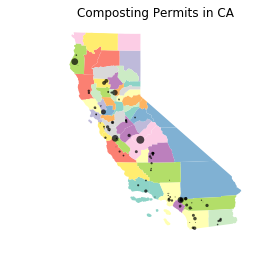

In [131]:
# better plot, with title
f, ax = plt.subplots(1)
CA.plot(ax = ax, cmap='Set3', figsize = (10,6), linewidth=0.1)
swis.plot(ax = ax, markersize = swis.cap_m3/10000, marker = 'o', color = 'black', alpha=.7, linewidth=0)
ax.axis('off')
ax.set_title('Composting Permits in CA', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/FacilitiesbyCapacity.png", dpi=300)

In [132]:
# make gdf for plotting capacity by county 
CA["County"] = CA["NAME"]
swis_joined = pd.merge(swis, CA, on = "County")


# turn capacity from cubic meters into tons --> m3 * (1yd3/0.765m3) * (0.386ton/m3)
swis_joined['cap_tons'] = swis_joined['cap_m3'] * (1/0.765) * (0.386)
swis_joined.head()

# #sum capacity by county
swis_grouped = pd.DataFrame(swis_joined.groupby(['County'], as_index = False)['cap_tons'].sum())
# remerge with CA shapefile data
capmap = pd.merge(CA, swis_grouped, on = "County")
capmap.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,County,cap_tons
0,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-53692.14841964634 -435068.90484861...,Santa Barbara,91857.767296
1,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((33908.12392894991 -526703.193930760...,Ventura,6481.027796
2,06,037,00277283,06037,Los Angeles,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,(POLYGON ((123902.3558812202 -503236.488604530...,Los Angeles,143672.041424
3,06,097,01657246,06097,Sonoma,Sonoma County,06,H1,G4020,488,42220,None,A,4081437574,497508807,+38.5251824,-122.9261095,POLYGON ((-256278.6441238033 37049.10538577149...,Sonoma,38209.424026
4,06,073,00277301,06073,San Diego,San Diego County,06,H1,G4020,None,41740,None,A,10895149811,826195031,+33.0236041,-116.7761174,POLYGON ((239171.2658717657 -533898.4040978756...,San Diego,210960.540966


In [133]:
# foodwaste["County"] = foodwaste["COUNTY"]
# ow.rename(columns={'COUNTY':'County'}, 
#                  inplace=True)
# ow_sum.head()
owmap = pd.merge(CA, ow_sum, on = "County")
owmap.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,County,WetTons
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,POLYGON ((-56192.57028813594 186608.4199908176...,Sierra,1339.660509
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-103238.272692511 78232.45042174123,...",Sacramento,636621.532077
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,(POLYGON ((-53692.14841964634 -435068.90484861...,Santa Barbara,187819.410078
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,POLYGON ((-55079.94444234047 36283.02501270594...,Calaveras,16364.637787
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,(POLYGON ((33908.12392894991 -526703.193930760...,Ventura,420993.324626


In [134]:
# ow.sort_values(by=['disposal.yields'])

In [135]:
# swis.crs
# capmap.crs
# CA.crs
# swis[swis['County'] == "San Bernardino"]

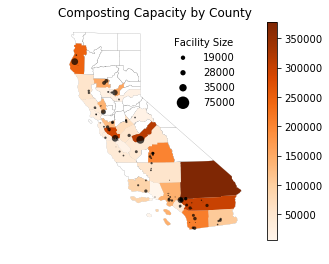

In [138]:
#### PLOT CAPACITY BY COUNTY #####
plotvar = capmap['cap_tons']

# before plotting prep legend
c = []
for i in [10, 25, 50, 75]:
    c.append(int(round(np.percentile(plotvar, i), -3)))

# Map Capacity by County
f, ax = plt.subplots(1)
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "black")
capmap.plot(ax = ax, column = plotvar, cmap = "Oranges", legend = True)
swis.set_geometry('geometry').plot(ax = ax, markersize = swis.cap_m3/10000, marker = 'o', 
                                  legend = True, color = 'black', alpha=.7, linewidth=0)
ax.axis('off')
ax.set_title('Composting Capacity by County', fontdict={'fontsize': '12', 'fontweight' : '3'})

l1 = plt.scatter([],[], s=c[0]/1000, edgecolors='none', color = "black")
l2 = plt.scatter([],[], s=c[1]/1000, edgecolors='none', color = "black")
l3 = plt.scatter([],[], s=c[2]/1000, edgecolors='none', color = "black")
l4 = plt.scatter([],[], s=c[3]/1000, edgecolors='none', color = "black")

labels = [str(c[0]), str(c[1]), str(c[2]), str(c[3])]
labels = [str(c[0]), str(c[1]), "35000", "75000"]

leg = plt.legend([l1, l2, l3, l4], labels, ncol = 1, frameon=False, fontsize=10,
handlelength=2, loc = 1, borderpad = 1,
handletextpad=1, title='Facility Size', scatterpoints = 1)


plt.savefig("maps/CapacitybyCounty.png", dpi=300)

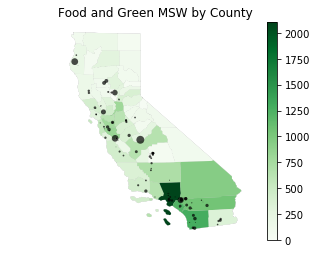

In [148]:
#### PLOT ORGANIC WASTE GENERATION BY COUNTY #####
plotvar = np.sqrt(owmap['WetTons'])
# column.sort_values()
# owmap['disposal.yields']

f, ax = plt.subplots()
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "black")
owplot = owmap.plot(ax = ax, column = plotvar, cmap = "Greens", legend = True)
swis.set_geometry('geometry').plot(ax = ax, markersize = swis.cap_m3/10000, marker = 'o', 
                                  legend = True, color = 'black', alpha=.7, linewidth=0)
# plt.colorbar(label="waste")
ax.axis('off')
ax.set_title('Food and Green MSW by County', fontdict={'fontsize': '12', 'fontweight' : '3'})
plt.savefig("maps/OWbyCounty.png", dpi=300)

In [140]:
# disposal = dict(zip(ow['County'], ow['disposal.yields']))
# capacity = dict(zip(swis['County'], swis['cap_m3']))
disposal = pd.DataFrame(ow['County'], ow['BDTons'])

In [141]:
merged = pd.merge(owmap, swis_grouped, on = "County" )

merged['excess'] = merged['WetTons'] - merged['cap_tons']

# merged.sort_values(['excess']).head()
merged['excess'].sum()

10700987.731889168

/Users/anayahall/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys
/Users/anayahall/anaconda/lib/python3.6/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


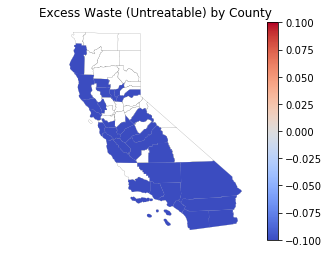

In [145]:
### PLOT DIFFERENCE BETWEEN GENERATION AND CAPACITY ####

## redo as bubbles with color for poverty??

plotvar = merged['excess'] * (1/100) 
# plotvar = np.sqrt(merged['excess'])
# plotvar = np.log(merged['excess'])

f, ax = plt.subplots(1)
CA.plot(ax = ax, color = "white", figsize = (10,10), linewidth=0.1, edgecolor = "black")
merged.plot(ax = ax, column = plotvar, cmap = "coolwarm", legend = True)
# swis.set_geometry('geometry').plot(ax = ax, markersize = swis.cap_m3/10000, marker = 'o', 
#                                   legend = True, color = 'black', alpha=.7, linewidth=0)
ax.axis('off')
ax.set_title('Excess Waste (Untreatable) by County', fontdict={'fontsize': '12', 'fontweight' : '3'})
